<a href="https://colab.research.google.com/github/nestorjuarezR/Data_Science/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install kneed

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import  KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
#Crear datos de prueba
datos, etiquetas = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state=42
)

In [5]:
datos[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [6]:
etiquetas[:5]

array([1, 0, 2, 2, 2])

# Escalado de datos

In [8]:
scalador = StandardScaler()
datos_escalados = scalador.fit_transform(datos)

In [9]:
datos_escalados[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

# KMEANS

In [11]:
modelo = KMeans(
    init='random',
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)

In [12]:
modelo.fit(datos_escalados)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [13]:
modelo.inertia_

74.57960106819854

In [14]:
#Coordenadas del centro de los clusters
modelo.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [15]:
#Numero de iteracciones necesarias
modelo.n_iter_

6

In [19]:
print(f'Etiquetas establecidad por el modelo: {modelo.labels_[:5]}')

Etiquetas establecidad por el modelo: [0 1 2 2 2]


In [20]:
print(f'Etiquetas reales de los datos:{etiquetas[:5]}')

Etiquetas reales de los datos:[1 0 2 2 2]


In [21]:
y_pred = modelo.predict(datos_escalados)

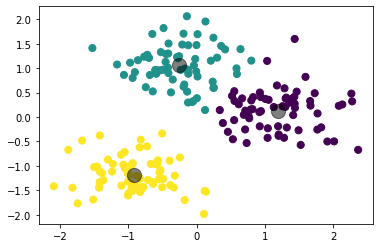

In [22]:
plt.scatter(
    datos_escalados[:,0],
    datos_escalados[:,1],
    c=y_pred,
    s=50,
    cmap = 'viridis'
)

centros = modelo.cluster_centers_
plt.scatter(
    centros[:,0],
    centros[:,1],
    c='black',
    s=200,
    alpha=0.5
    )

#Validación

## Codo Elbow

In [25]:
sse = []
rango = range(1,11)

for k in rango:
  m = KMeans(
      init='random',
      n_clusters= k,
      n_init = 10,
      max_iter = 300,
      random_state=40
  )
  m.fit(datos_escalados)
  sse.append(m.inertia_)

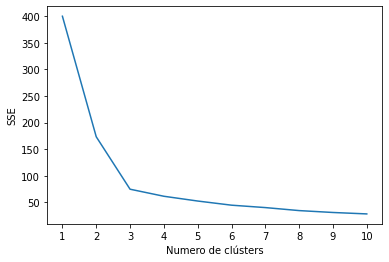

In [26]:
plt.plot(rango, sse)
plt.xticks(rango)
plt.xlabel('Numero de clústers')
plt.ylabel('SSE')
plt.show()

In [28]:
kl = KneeLocator(rango,
                 sse,
                 curve='convex',
                 direction = 'decreasing')
print(f'Numero de optimo de clústers: {kl.elbow}')

Numero de optimo de clústers: 3


##Silhouette Coefficient

In [29]:
coeficientes = []
rango = range(2,11)

for k in rango:
  m = KMeans(
      init='random',
      n_clusters= k,
      n_init = 10,
      max_iter = 300,
      random_state=40
  )
  m.fit(datos_escalados)
  score = silhouette_score(datos_escalados, m.labels_)
  coeficientes.append(score)

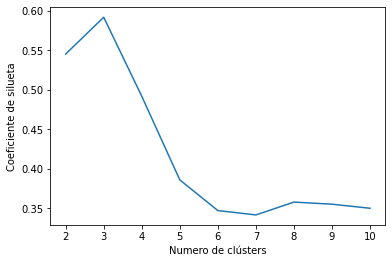

In [31]:
plt.plot(rango, coeficientes)
plt.xticks(rango)
plt.xlabel('Numero de clústers')
plt.ylabel('Coeficiente de silueta')
plt.show()

#Comparativa de modelos

In [32]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(datos_escalados)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [34]:
kmeans_silhouette = silhouette_score(datos_escalados, modelo.labels_).round(2)
dbscan_silhouette = silhouette_score(datos_escalados, dbscan.labels_).round(2)

In [35]:
print(f'Coeficiente de Kmeans: {kmeans_silhouette}')
print(f'Coeficiente de DBSCAN: {dbscan_silhouette}')

Coeficiente de Kmeans: 0.59
Coeficiente de DBSCAN: 0.35


In [42]:
ari_kmeans = adjusted_rand_score(etiquetas, modelo.labels_)
ari_dbscan = adjusted_rand_score(etiquetas, dbscan.labels_)

In [44]:
print(f'Score de modelo Kmeans: {round(ari_kmeans, 2)}')
print(f'Score de modelo DBSCAN: {round(ari_dbscan, 2)}')

Score de modelo Kmeans: 0.96
Score de modelo DBSCAN: 0.42
